In [1]:
from bayesian_optimization.bo import BayesianOptimization
# from bayesian_optimization.acquisition_functions import AcquisitionFunction
from evaluation.decoder_based_evaluation import CSS_Evaluator,binomial_probability
from bayesian_optimization.kernels import GNNKernel, WLSubtreeKernel,GNNEmbedding
from code_construction.code_construction import CodeConstructor
from bayesian_optimization.encoder import CSSEncoder
from bayesian_optimization.bo import ObjectiveFunction
import torch
from bayesian_optimization.gp import GaussianProcess_QEC
import matplotlib.pyplot as plt
import torch.nn as nn
from grakel.kernels import WeisfeilerLehman, VertexHistogram,RandomWalkLabeled
from gpytorch.kernels import ScaleKernel, RBFKernel
import numpy as np
from code_construction.code_construction import CSSCode
DEVICE='cuda'


/home/cyyh/miniconda3/envs/QEC2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pp = 0.01
rsc = CodeConstructor('rotated-surface')
rs = rsc.construct(9)
evaluator = CSS_Evaluator(rs.hx,rs.hz)
for i in range(10):
    p_l,P_L=evaluator.Get_precise_logical_error_rate(pp,trail=1000,block = 9999)
    var1 = sum([binomial_probability(rs.n,n_e,pp)**2 * P_L[n_e]*(1-P_L[n_e])/1000 for n_e in range(rs.n)])
    print(p_l,var1,P_L)

/home/cyyh/miniconda3/envs/QEC2/lib/python3.10/site-packages/ldpc/_legacy_ldpc_v1/_legacy_bposd_decoder.py:45: UserWarning: This is the old syntax for the `bposd_decoder` from `ldpc v1`. Use the `BpOsdDecoder` class from `ldpc v2` for additional features.
  warnings.warn(


0.00035856909694475966 4.4511866823440915e-08 [0, 0.0, 0.002, 0.001, 0.003, 0.002, 0.008, 0.003, 0.004, 0.01, 0.012, 0.015, 0.022, 0.019, 0.025, 0.033, 0.034, 0.042, 0.041, 0.049, 0.043, 0.061, 0.074, 0.068, 0.073, 0.067, 0.08, 0.078, 0.09, 0.097, 0.092, 0.11, 0.108, 0.106, 0.148, 0.148, 0.138, 0.159, 0.133, 0.143, 0.163, 0.148, 0.149, 0.156, 0.156, 0.172, 0.173, 0.196, 0.177, 0.212, 0.204, 0.188, 0.209, 0.217, 0.218, 0.233, 0.237, 0.231, 0.242, 0.215, 0.247, 0.248, 0.251, 0.273, 0.273, 0.283, 0.255, 0.272, 0.273, 0.287, 0.302, 0.298, 0.293, 0.334, 0.332, 0.312, 0.305, 0.331, 0.338, 0.373, 0.358]
0.0019392468902991288 5.738732496415249e-07 [0, 0.004, 0.002, 0.005, 0.0, 0.001, 0.002, 0.003, 0.005, 0.009, 0.012, 0.012, 0.015, 0.025, 0.017, 0.037, 0.028, 0.034, 0.033, 0.045, 0.042, 0.053, 0.069, 0.064, 0.085, 0.084, 0.086, 0.094, 0.111, 0.092, 0.108, 0.12, 0.113, 0.125, 0.114, 0.118, 0.141, 0.137, 0.135, 0.141, 0.133, 0.145, 0.17, 0.172, 0.177, 0.173, 0.18, 0.177, 0.193, 0.187, 0.202, 0.2

In [3]:
pp = 0.01
rsc = CodeConstructor('rotated-surface')
rs = rsc.construct(9)
evaluator = CSS_Evaluator(rs.hx,rs.hz)
for i in range(10):
    p_l,P_L,var2=evaluator.Get_precise_logical_error_rate_iterative(physical_error_rate=pp, total_trail=10000, block=999, init_samples=300, batch_size=10)
    print(p_l,var2,P_L)

/home/cyyh/miniconda3/envs/QEC2/lib/python3.10/site-packages/ldpc/_legacy_ldpc_v1/_legacy_bposd_decoder.py:45: UserWarning: This is the old syntax for the `bposd_decoder` from `ldpc v1`. Use the `BpOsdDecoder` class from `ldpc v2` for additional features.
  warnings.warn(


0.0012084353074446102 1.4551528001225025e-06 [0.0033333333333333335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006666666666666667, 0.006666666666666667, 0.016666666666666666, 0.0033333333333333335, 0.006666666666666667, 0.013333333333333334, 0.02666666666666667, 0.013333333333333334, 0.04, 0.02, 0.03, 0.056666666666666664, 0.05333333333333334, 0.04666666666666667, 0.04666666666666667, 0.04, 0.07, 0.08333333333333333, 0.09666666666666666, 0.07666666666666666, 0.09666666666666666, 0.1, 0.12333333333333334, 0.12, 0.09333333333333334, 0.13, 0.08666666666666667, 0.09666666666666666, 0.13666666666666666, 0.14, 0.16333333333333333, 0.13, 0.1, 0.16666666666666666, 0.16666666666666666, 0.11666666666666667, 0.16, 0.16666666666666666, 0.15, 0.19666666666666666, 0.18666666666666668, 0.21, 0.17666666666666667, 0.23333333333333334, 0.24333333333333335, 0.21, 0.24, 0.18333333333333332, 0.2633333333333333, 0.23666666666666666, 0.22666666666666666, 0.25333333333333335, 0.24666666666666667, 0.24, 0.25333333333333335, 

0.07476943122482423
1.0


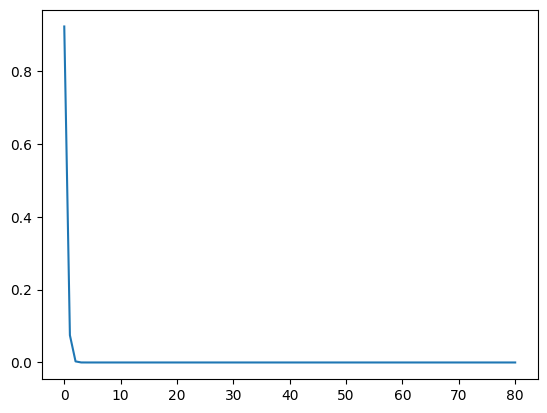

In [ ]:
p_ne = [binomial_probability(81,n_e,0.001) for n_e in range(81)]

print(sum(p_ne))
plt.plot(p_ne)
# plt.xscale('log')
# plt.yscale('log')

8
288
1.6087845313258702


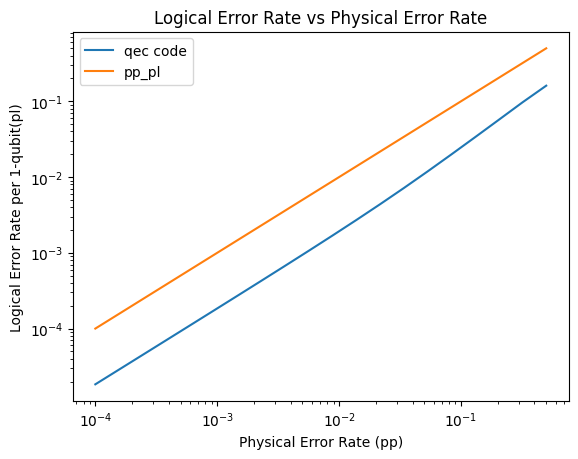

In [15]:
from bayesian_optimization.bo import ObjectiveFunction
import numpy as np
c_gnn_333 = np.array([0,3,0,0,1,0,2,3,1])
c_wl_333 = np.array([2,3 ,0 ,0 ,0 ,1 ,0 ,0 ,3]) # [[162,18]]
c_gnn_333_hill_climbing = np.array([3,0 ,3 ,1 ,3 ,2 ,2 ,0 ,1]) # [[512,8]]
c_gnn_443_hill_climbing = np.array([2, 2, 2, 1, 3, 2, 1, 1, 2, 3, 3, 0, 1, 2, 0, 3]) # [[288,2]]
c_444_test = np.array([1 ,3,2,0,0,0,2,1,2,3,0,4,0,2,3,4])
# [2., 0., 2., 0., 1., 0., 2., 2., 2., 1., 2., 2., 1., 0., 1., 2., 2., 0.,
        # 2., 1., 2., 1., 2., 0., 0., 0., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1.] 6,6,2
codeconstructor = CodeConstructor('qc-ldpc-hgp',{'p':3,'q':3,'m':3})
codeconstructor4 = CodeConstructor('qc-ldpc-hgp',{'p':4,'q':4,'m':4})
codeconstructor5 = CodeConstructor('qc-ldpc-hgp',{'p':4,'q':4,'m':3})
HGPOF3 =ObjectiveFunction(codeconstructor)
HGPOF4 = ObjectiveFunction(codeconstructor4,pp=0.01)
HGPOF5 = ObjectiveFunction(codeconstructor5,pp=0.01)
RSOF = ObjectiveFunction(CodeConstructor('rotated-surface'))
print(codeconstructor4.construct(c_444_test).k)
print(codeconstructor5.construct(c_gnn_443_hill_climbing).n)
# print(HGPOF5.lerpq(c_gnn_443_hill_climbing))
# print(HGPOF3.distance(c_gnn_333))
# print(HGPOF3.distance(c_wl_333))
# print(HGPOF3.psuedo_threshold(c_gnn_333))
print(RSOF.distance(3))

RSOF.show_ler_plot(3)
# HGPOF3.show_ler_plot(c_gnn_333)

[[0 1 1 0 0 0 0 0 0]
 [1 1 0 1 1 0 0 0 0]
 [0 0 0 0 1 1 0 1 1]
 [0 0 0 0 0 0 1 1 0]]


/home/cyyh/miniconda3/envs/QEC2/lib/python3.10/site-packages/ldpc/_legacy_ldpc_v1/_legacy_bposd_decoder.py:45: UserWarning: This is the old syntax for the `bposd_decoder` from `ldpc v1`. Use the `BpOsdDecoder` class from `ldpc v2` for additional features.
  warnings.warn(


0.021825160220194567
0.009729825143959696
0.0016252509774087748
0.0007649817577034251
0.00017603564047070366
1.7088320389479337e-05
0.01832010944487589
0.006964982256535845
0.0012928690406466034
0.0006747921140631809
0.00012245091048634771
1.2503101590862117e-05
0.015812752184503027
0.004770880684059876
0.0010439920656261322
0.00046850432310044013
0.00011272887649494206
1.1979171790418095e-05
0.007135378414493194
0.0020530754594122094
0.00025276681553605294
0.0005178513900837498
8.805492827148611e-05
7.413069411857786e-06
0.01279075851034207
0.0031355005198418326
0.000768333848169509
0.00040866252014858193
0.00012531871073326165
7.394734335581489e-06
0.0174881344172962
0.0037442046501626153
0.0004729482500926371
0.0003331606983404869
2.2739883338722667e-05
5.174993308751525e-06


IndexError: list index out of range

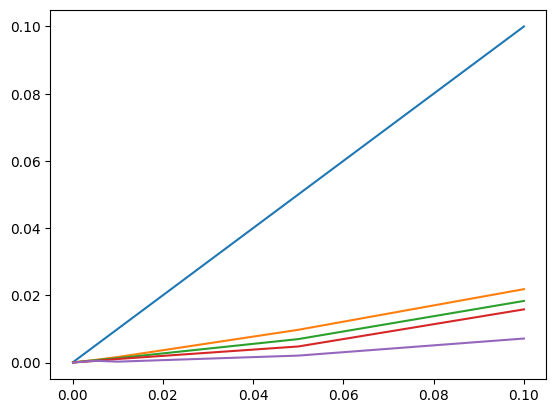

In [40]:
c_gnn_333 = np.array([0,3,0,0,1,0,2,3,1])
c_wl_333 = np.array([2,3 ,0 ,0 ,0 ,1 ,0 ,0 ,3])
# [3 0 3 1 3 2 2 0 1]
codeconstructor = CodeConstructor('qc-ldpc-hgp',{'p':3,'q':3,'m':3})
surfacecode_constructor = CodeConstructor('rotated-surface',None)


codes = []
for i in range(1,7):
    codes.append(surfacecode_constructor.construct(2*i + 1))
print(codes[0].hx)


pl_list = []
for i in range(len(codes)):
    evaluator =  CSS_Evaluator(codes[i].hx,codes[i].hz)
    PL= []
    for pp in [0.1,0.05,0.01,0.005,0.001,0.0001]:
        pl,_ = evaluator.Get_precise_logical_error_rate(physical_error_rate=pp,trail = 10000,block=999)
        print(pl)
        PL.append(pl)
    pl_list.append(PL)
pp_values = [0.1,0.05,0.01,0.005,0.001,0.0001]
labels = ['Surface7', 'Surface9', 'Surface11', 'Surface13']
plt.plot(pp_values,pp_values,label='pp=pl')
for i in range(len(pl_list)):
    plt.plot(pp_values, pl_list[i], label=labels[i])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Physical Error Rate (pp)')
plt.ylabel('Logical Error Rate (pl)')
plt.legend()
plt.title('Logical Error Rate vs Physical Error Rate for Different Codes')
plt.show()

    


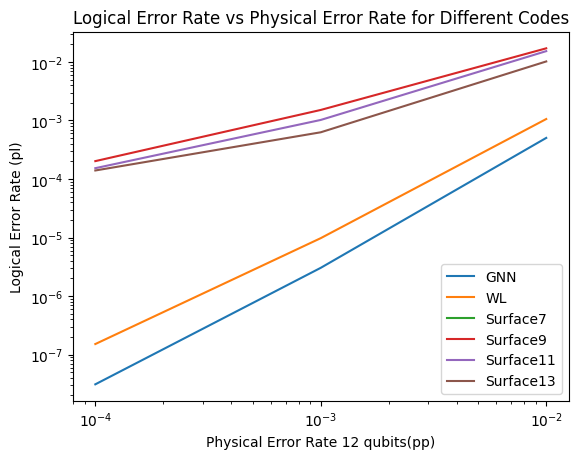

In [ ]:
for i in range(len(pl_list[0])):
    for j in range (len(pl_list)):
        pl_list[j][i] = 1-(1-pl_list[j][i])**(12)

pp_values = [0.01, 0.001, 0.0001]
labels = ['GNN', 'WL', 'Surface7', 'Surface9', 'Surface11', 'Surface13']

for i in range(len(pl_list)):
    plt.plot(pp_values, pl_list[i], label=labels[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Physical Error Rate 12 qubits(pp)')
plt.ylabel('Logical Error Rate (pl)')
plt.legend()
plt.title('Logical Error Rate vs Physical Error Rate for Different Codes')
plt.show()